# Investigating Airplane Accidents
## Dataset description
Airplane accidents from 1948 to 2015 in the US
## To-do:
- \# of accidents in each US state / % accidents
- \# of injuries per month
- \# of accidents per air carrier
- \# of accidents per airplane make and model
- Phase of flight where accidents occur
- Purpose of flight
- Percentage of accidents under adverse weather conditions
- Change of number of accidents throughout the years: Does the number of accidents decrease? Any special years?
- Map out accidents using the basemap library for matplotlib

In [53]:
# Disable warnings in Anaconda
import warnings
warnings.filterwarnings('ignore')

import pandas as pd # Data processing
pd.options.display.max_columns = 32 # show all columns
import numpy as np # Linear algebra
import datetime


import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import seaborn as sns
sns.set_style('dark')

In [2]:
aviation_data = pd.read_csv("AviationData.txt",sep="|")

## Data cleaning
To-do:
- Strip whitespaces
- Replace empty values with numpy.NaN
- Drop last column -it has new line values
- Location: Replace value with state
- Convert columns to float: Latitude, Longitude
- Convert columns to int: Number of Engines, Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, Total Uninjured
- Convert columns to datetime: Event Date, Publication Date
- Convert to bool: Amateur built

In [3]:
aviation_data_trimmed = aviation_data.apply( # strip whitespaces
    lambda x: x.str.strip()).replace(
    '', np.NaN) # replace null values with NaN

In [4]:
aviation_data_trimmed.drop(' ', axis=1, inplace=True) # drop last column with empty values
aviation_data_trimmed.rename(columns=lambda x : x.strip(),inplace=True)

In [5]:
aviation_data_trimmed.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date
0,20150908X74637,Accident,CEN15LA402,09/08/2015,"Freeport, IL",United States,42.246111,-89.581945,KFEP,albertus Airport,Non-Fatal,Substantial,Unknown,N24TL,CLARKE REGINALD W,DRAGONFLY MK,NaN,NaN,NaN,Part 91: General Aviation,NaN,Personal,NaN,NaN,1,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015
1,20150906X32704,Accident,ERA15LA339,09/05/2015,"Laconia, NH",United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,Fatal(1),Substantial,Weight-Shift,N2264X,EVOLUTION AIRCRAFT INC,REVO,No,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1,NaN,NaN,NaN,VMC,MANEUVERING,Preliminary,09/10/2015
2,20150908X00229,Accident,GAA15CA251,09/04/2015,"Hayes, SD",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N321DA,AIR TRACTOR INC,AT 402A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,NaN
3,20150903X33216,Accident,WPR15FA256,09/03/2015,"Santee, CA",United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,Fatal(2),Substantial,Airplane,N8441B,PIPER,PA28,No,1,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,2,NaN,NaN,NaN,VMC,TAKEOFF,Preliminary,09/09/2015
4,20150903X34535,Accident,ERA15LA338,09/03/2015,"Cresskill, NJ",United States,40.935833,-73.958611,NaN,N/A,Non-Fatal,Destroyed,Airplane,N758DK,CESSNA,R172K,No,1,Reciprocating,Public Use,NaN,Aerial Observation,NaN,NaN,2,NaN,NaN,VMC,NaN,Preliminary,09/10/2015


In [46]:
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

def replace_state(loc):
    '''Finds wether the location value has a US state in the string
    Takes in a value from row
    Returns either state or other if accident does not occur in the US"
    '''
    for state in states:
        if state in loc:
            return state
    return "other"

aviation_data_trimmed['Location'] = aviation_data_trimmed['Location'].astype("str").apply(replace_state) #astype("str") required due to NaN values

In [66]:
columns_to_float = ['Latitude','Longitude']
for col in columns_to_float:
    aviation_data_trimmed[col] = aviation_data_trimmed[col].astype("float")

columns_to_int = ["Number of Engines", "Total Fatal Injuries", "Total Serious Injuries", 
                  "Total Minor Injuries", "Total Uninjured"]
aviation_data_trimmed["Number of Engines"] = aviation_data_trimmed["Number of Engines"].fillna(1) # fill NaN values with 1 for Number of Engines
for col in columns_to_int:
    aviation_data_trimmed[col] = aviation_data_trimmed[col].fillna(0) # fill NaN values with 0 -except for Number of Engines
    aviation_data_trimmed[col] = aviation_data_trimmed[col].astype("int")

columns_to_datetime = ["Event Date", "Publication Date"]
for col in columns_to_datetime:
    aviation_data_trimmed[col] = pd.to_datetime(aviation_data_trimmed[col])

map_bool = {'Yes': True, 'No': False}
aviation_data_trimmed["Amateur Built"] = aviation_data_trimmed["Amateur Built"].map(map_bool)

In [67]:
aviation_data_trimmed.head()

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Status,Publication Date
0,20150908X74637,Accident,CEN15LA402,2015-09-08,IL,United States,42.246111,-89.581945,KFEP,albertus Airport,Non-Fatal,Substantial,Unknown,N24TL,CLARKE REGINALD W,DRAGONFLY MK,NaN,1,NaN,Part 91: General Aviation,NaN,Personal,NaN,0,1,0,0,VMC,TAKEOFF,Preliminary,2015-09-09
1,20150906X32704,Accident,ERA15LA339,2015-09-05,NH,United States,43.606389,-71.452778,LCI,Laconia Municipal Airport,Fatal(1),Substantial,Weight-Shift,N2264X,EVOLUTION AIRCRAFT INC,REVO,False,1,Reciprocating,Part 91: General Aviation,NaN,Personal,NaN,1,0,0,0,VMC,MANEUVERING,Preliminary,2015-09-10
2,20150908X00229,Accident,GAA15CA251,2015-09-04,SD,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N321DA,AIR TRACTOR INC,AT 402A,NaN,1,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,Preliminary,NaT
3,20150903X33216,Accident,WPR15FA256,2015-09-03,CA,United States,32.829445,-116.988611,SEE,GILLESPIE FIELD,Fatal(2),Substantial,Airplane,N8441B,PIPER,PA28,False,1,Reciprocating,Part 91: General Aviation,NaN,Instructional,NaN,2,0,0,0,VMC,TAKEOFF,Preliminary,2015-09-09
4,20150903X34535,Accident,ERA15LA338,2015-09-03,NJ,United States,40.935833,-73.958611,NaN,N/A,Non-Fatal,Destroyed,Airplane,N758DK,CESSNA,R172K,False,1,Reciprocating,Public Use,NaN,Aerial Observation,NaN,0,2,0,0,VMC,NaN,Preliminary,2015-09-10


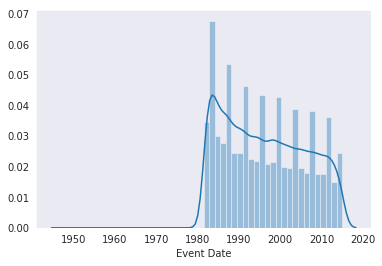

In [97]:
sns.distplot(
    aviation_data_trimmed[aviation_data_trimmed[
        "Event Date"].notnull()].loc[:,"Event Date"].dt.year)

In [82]:
aviation_data_trimmed["Event Year"] = aviation_data_trimmed["Event Date"].dt.year

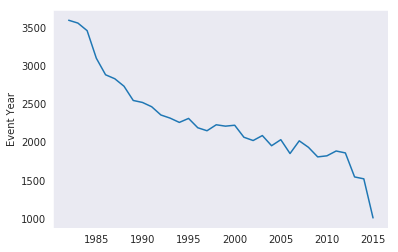

In [106]:
aviation_data_trimmed["Event Year"].value_counts().sort_values()
## drop values with only 1 value per year -> do line plot instead of histogram
year_values = aviation_data_trimmed["Event Year"].value_counts()
year_values = year_values.drop(year_values[year_values==1].index)
sns.lineplot(y=year_values,x=year_values.index)